### Record

* 
-------
* This version does not consider `Hour` as a feature and use stratified dataset
----
* numerical value for city id & region id 
---- LinAlgError: Singular matrix

keep only one of region id and city id 

* convert numerical variables to categorical variables based on the meaning

* 

### Question

1. which dataset is used to do the cross validation? test or train
2. how to deal with NAN in n_clicks? 

### Goal

4. bundle the region id

5. random forest

6. convert timestamp to see the effect of weekday

7. set NAN as a column 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.subplots import make_subplots

In [2]:
pwd()

'/Users/jzw/Downloads/0 CAPSTONE/ipinyou.contest.dataset/data_exploration'

In [3]:
com_ad = pd.read_csv('final_training_testing_stratified.csv')
com_ad.drop(['Unnamed: 0'], axis=1, inplace=True)
# com_ad.info()
com_ad.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Timestamp_bid,User-Agent_bid,Region ID_bids_join_impressions,City ID,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Ad Slot Format,Ad Slot Floor Price,...,13678,13776,13800,13866,13874,14273,16593,16617,16661,16706
0,20130606000104044,mozilla/4.0 (compatible; msie 8.0; windows nt ...,80,80,1,300,250,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20130607000103558,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,106,107,2,728,90,0,0,162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20130607000103600,mozilla/5.0 (windows nt 6.1) applewebkit/537.1...,94,95,1,300,250,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20130610000102963,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.1...,275,275,2,120,600,0,0,250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20130608000103201,mozilla/4.0 (compatible; msie 6.0; windows nt ...,80,89,1,300,250,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### fillna with 0 to indicate if a specific user profile exists

In [4]:
# fillna with 0 to indicate if a specific user profile exists
com_ad[['10006','10024', '10031', '10048', '10052', '10057', '10059', '10063', '10067',
       '10074', '10075', '10076', '10077', '10079', '10083', '10093', '10102',
       '10110', '10111', '10684', '11092', '11278', '11379', '11423', '11512',
       '11576', '11632', '11680', '11724', '11944', '13042', '13403', '13496',
       '13678', '13776', '13800', '13866', '13874', '14273', '16593', '16617',
       '16661', '16706']] = com_ad[['10006','10024', '10031', '10048', '10052', '10057', '10059', '10063', '10067',
       '10074', '10075', '10076', '10077', '10079', '10083', '10093', '10102',
       '10110', '10111', '10684', '11092', '11278', '11379', '11423', '11512',
       '11576', '11632', '11680', '11724', '11944', '13042', '13403', '13496',
       '13678', '13776', '13800', '13866', '13874', '14273', '16593', '16617',
       '16661', '16706']].fillna(0)

com_ad[['10006','10024', '10031', '10048', '10052', '10057', '10059', '10063', '10067',
       '10074', '10075', '10076', '10077', '10079', '10083', '10093', '10102',
       '10110', '10111', '10684', '11092', '11278', '11379', '11423', '11512',
       '11576', '11632', '11680', '11724', '11944', '13042', '13403', '13496',
       '13678', '13776', '13800', '13866', '13874', '14273', '16593', '16617',
       '16661', '16706']]

,10006,10024,10031,10048,10052,10057,10059,10063,10067,10074,...,13678,13776,13800,13866,13874,14273,16593,16617,16661,16706
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532892,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532893,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# #columns in impression
# '''

# 'bidid', 'timestamp', 'logtype', 'ipinyouid', 'useragent', 
# 'ip', 'region', 'city', 'adexchange', 'domain', 'url', 
# 'urlid','slotid', 'slotwidth', 'slotheight', 'slotvisibility', 
# 'slotformat', 'slotprice','creative', 'bidprice', 'payprice', 
# 'keypage', 'advertiser', 'usertag'

# '''

In [5]:
com_ad.shape

(532897, 69)

#### Keep columns that are useful for model from imp to click

In [6]:
# have a dataset for model probability of click from impression
# user agent and user profile id
# 0304 only keep region id since it's highly related to the city id

# delete_col = ['Timestamp_bid', 'User-Agent_bid',
#            'User Profile IDs_bid','User-Agent_imp','n_impressions','Timestamp', 
#            'User-Agent','User Profile IDs']

ad_imp = com_ad[['City ID', 'Ad Exchange',
       'Ad Slot Width', 'Ad Slot Height', 'Ad Slot Visibility','Region ID_bids_join_impressions',
       'Ad Slot Format', 'Ad Slot Floor Price', 'Bidding Price',
       'Advertiser ID', 'Timestamp_imp','Log Type', 'Paying Price',
       'n_clicks', 'has impression', 'has click', '10006',
       '10024', '10031', '10048', '10052', '10057', '10059', '10063', '10067',
       '10074', '10075', '10076', '10077', '10079', '10083', '10093', '10102',
       '10110', '10111', '10684', '11092', '11278', '11379', '11423', '11512',
       '11576', '11632', '11680', '11724', '11944', '13042', '13403', '13496',
       '13678', '13776', '13800', '13866', '13874', '14273', '16593', '16617',
       '16661', '16706']]

ad_imp.shape

(532897, 59)

<AxesSubplot:>

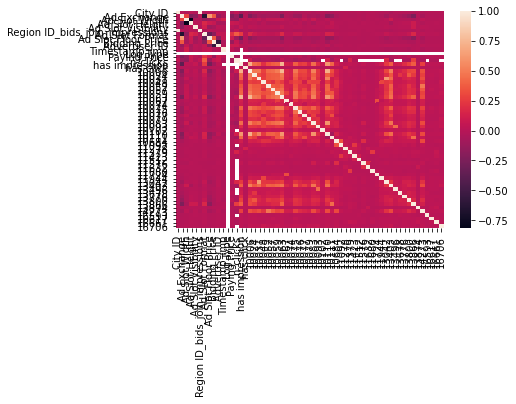

In [7]:
corr = ad_imp.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [8]:
# print top two correlations for each column 
for i in ad_imp.columns:
    print(corr[i].nlargest(2))

City ID                            1.000000
Region ID_bids_join_impressions    0.994778
Name: City ID, dtype: float64
Ad Exchange            1.000000
Ad Slot Floor Price    0.631783
Name: Ad Exchange, dtype: float64
Ad Slot Width    1.000000
Ad Exchange      0.283041
Name: Ad Slot Width, dtype: float64
Ad Slot Height    1.000000
Ad Slot Format    0.164827
Name: Ad Slot Height, dtype: float64
Ad Slot Visibility    1.000000
Ad Slot Format        0.126547
Name: Ad Slot Visibility, dtype: float64
Region ID_bids_join_impressions    1.000000
City ID                            0.994778
Name: Region ID_bids_join_impressions, dtype: float64
Ad Slot Format    1.000000
n_clicks          0.380898
Name: Ad Slot Format, dtype: float64
Ad Slot Floor Price    1.000000
Ad Exchange            0.631783
Name: Ad Slot Floor Price, dtype: float64
Bidding Price    1.000000
Ad Exchange      0.371729
Name: Bidding Price, dtype: float64
Advertiser ID    1.000000
n_clicks         0.096676
Name: Advertiser ID, dt

#### Remove the city id since it's highly related to region id

In [9]:
ad_imp = ad_imp.drop(['City ID'], axis=1)
ad_imp.shape

(532897, 58)

In [10]:
ad_imp_summary = ad_imp.describe()
ad_imp_summary

,Ad Exchange,Ad Slot Width,Ad Slot Height,Ad Slot Visibility,Region ID_bids_join_impressions,Ad Slot Format,Ad Slot Floor Price,Bidding Price,Advertiser ID,Timestamp_imp,...,13678,13776,13800,13866,13874,14273,16593,16617,16661,16706
count,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,1.219040e+05,...,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000,532897.000000
mean,2.522065,568.784527,187.061158,1.334027,154.248176,0.132724,47.082524,272.818004,2876.632674,2.013061e+16,...,0.004269,0.012259,0.024487,0.045125,0.000105,0.023308,0.000180,0.000340,0.000358,0.000377
std,0.693825,323.229139,107.900763,14.931340,98.083550,0.446124,40.992372,29.850926,873.591274,1.997986e+09,...,0.065199,0.110076,0.154725,0.208003,0.010251,0.151055,0.013421,0.018427,0.018929,0.019418
min,1.000000,120.000000,60.000000,0.000000,-1.000000,0.000000,0.000000,227.000000,1458.000000,2.013061e+16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,300.000000,90.000000,0.000000,80.000000,0.000000,5.000000,241.000000,1458.000000,2.013061e+16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,336.000000,250.000000,0.000000,146.000000,0.000000,50.000000,300.000000,3386.000000,2.013061e+16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1000.000000,250.000000,1.000000,216.000000,0.000000,80.000000,300.000000,3427.000000,2.013061e+16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1000.000000,600.000000,255.000000,395.000000,5.000000,295.000000,300.000000,3476.000000,2.013061e+16,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# filter constant feature [std = 0]
ad_imp_summary.loc['std'][ad_imp_summary.loc['std'] == 0]

Log Type    0.0
Name: std, dtype: float64

In [12]:
# drop feature Log Type because it's a constant
ad_imp.drop(['Log Type'], axis=1, inplace=True)

#### filter data with `impression` == 1

In [13]:
# filter has impression == 1 to get the suitable dataset
ad_imp2clk = ad_imp[ad_imp['has impression']==1]
print(ad_imp2clk.shape)
# drop column has impression because now it is a constant
ad_imp2clk.drop(['has impression'], axis=1, inplace=True)
print(ad_imp2clk.shape)

(121904, 57)
(121904, 56)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Convert some numerical variables to categorical variables

* Ad Exchange: the source of replacement of this as

* Ad Slot Visibility: relative location to the fold

* Ad Slot Format: popup / fixed

* Advertiser ID: advertiser field

* Region ID

NOT include in the dataset

** Ad Slot ID: the location of current id

** Creative ID:

In [14]:
# set ad exchange as object to get dummy variables
ad_imp2clk['Ad Exchange'] = ad_imp2clk['Ad Exchange'].astype('object')
# set ad slot visibility as object to get dummy variables
ad_imp2clk['Ad Slot Visibility'] = ad_imp2clk['Ad Slot Visibility'].astype('object')
# set ad slot format as object to get dummy variables
ad_imp2clk['Ad Slot Format'] = ad_imp2clk['Ad Slot Format'].astype('object')
# set advertiser id as object to get dummy variables
ad_imp2clk['Advertiser ID'] = ad_imp2clk['Advertiser ID'].astype('object')
# set region id as object to get dummy variables
ad_imp2clk['Region ID_bids_join_impressions'] = ad_imp2clk['Region ID_bids_join_impressions'].astype('object')

<ipython-input-14-c80173d19aeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_imp2clk['Ad Exchange'] = ad_imp2clk['Ad Exchange'].astype('object')
<ipython-input-14-c80173d19aeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_imp2clk['Ad Slot Visibility'] = ad_imp2clk['Ad Slot Visibility'].astype('object')
<ipython-input-14-c80173d19aeb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [15]:
# convert region id into dummy variables
ad_imp2clk_enc = pd.get_dummies(ad_imp2clk, columns = ['Ad Exchange', 'Ad Slot Visibility','Ad Slot Format','Region ID_bids_join_impressions','Advertiser ID'])
ad_imp2clk_enc.head()

,Ad Slot Width,Ad Slot Height,Ad Slot Floor Price,Bidding Price,Timestamp_imp,Paying Price,n_clicks,has click,10006,10024,...,Region ID_bids_join_impressions_368,Region ID_bids_join_impressions_374,Region ID_bids_join_impressions_393,Region ID_bids_join_impressions_394,Region ID_bids_join_impressions_395,Advertiser ID_1458,Advertiser ID_3358,Advertiser ID_3386,Advertiser ID_3427,Advertiser ID_3476
0,300,250,0,227,2.013061e+16,62.0,NaN,0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,728,90,162,238,2.013061e+16,182.0,NaN,0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,300,250,0,227,2.013061e+16,95.0,NaN,0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,120,600,250,300,2.013061e+16,250.0,NaN,0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,300,250,0,227,2.013061e+16,234.0,NaN,0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
ad_imp2clk_enc.columns

   #### Prepare training and testing dataset based on encoded impression dataset

In [16]:
ad_imp2clk_enc.shape

(121904, 102)

In [17]:
# use earlier five days as training data 
imp2clk_train = ad_imp2clk_enc[ad_imp2clk_enc['Timestamp_imp']<20130611000000000]
# use the following two days as testing data
imp2clk_test = ad_imp2clk_enc[ad_imp2clk_enc['Timestamp_imp'] >= 20130611000000000]

In [18]:
# baseline model
train_clk = np.sum(imp2clk_train['has click']==1)
train_not_clk = np.sum(imp2clk_train['has click']==0)

print(pd.Series({'0': train_not_clk, '1': train_clk}))

# baseline model should predict not click for all observations in the test set

0    87955
1       59
dtype: int64


In [19]:
# baseline model prediction probability
baseline_clk_prob = train_clk / (train_clk + train_not_clk)
baseline_clk_prob

0.0006703478991978549

In [20]:
# filter all constant features in the impression training set
imp2clk_train_summary = imp2clk_train.describe()
imp2clk_train_summary.loc['std'][imp2clk_train_summary.loc['std'] == 0]

Series([], Name: std, dtype: float64)

In [21]:
# training set
X1_train = imp2clk_train.drop('has click', axis=1)
y1_train = imp2clk_train[['has click']]

In [22]:
# testing set
X1_test = imp2clk_test.drop('has click', axis=1)
y1_test = imp2clk_test[['has click']]

#### Drop the feature `n_clicks` because it has too many NAN

In [23]:
# column n_clicks has too many missing values -> delete it directl
X1_train = X1_train.drop(['n_clicks'], axis=1)
X1_test  = X1_test.drop(['n_clicks'], axis=1)

## CART choose parameters

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
#                'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]} 

tic = time.time()

dtc = DecisionTreeClassifier()
dtc_cv_logloss = GridSearchCV(dtc, param_grid = grid_values,scoring='neg_log_loss', cv=10, verbose=2) 
dtc_cv_logloss.fit(X1_train, y1_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

Fitting 10 folds for each of 201 candidates, totalling 2010 fits
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] EN

[CV] END ccp_alpha=0.003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0035, max_depth=30, min_samp

[CV] END ccp_alpha=0.006500000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.006500000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.006500000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.007, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.007, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.007, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.007, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.007, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END cc

[CV] END ccp_alpha=0.01, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.01, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.01, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.01, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.01, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0105, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0105, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0105, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0105, max_depth=30, min_samples_leaf=

[CV] END ccp_alpha=0.0135, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0135, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0135, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0135, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0135, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0135, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0135, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.014, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.014, max_depth=30, min_sampl

[CV] END ccp_alpha=0.017, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.017, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.017, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.017, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.017, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.017, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.017, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0175, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0175, max_depth=30, min_samples_le

[CV] END ccp_alpha=0.0205, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0205, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0205, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0205, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0205, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0205, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0205, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0205, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0205, max_depth=30, min_sam

[CV] END ccp_alpha=0.0235, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.024, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.024, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.024, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.024, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.024, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.024, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.024, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.024, max_depth=30, min_samples_lea

[CV] END ccp_alpha=0.027, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.027, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.027, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.027, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0275, max_depth=30, min_samples

[CV] END ccp_alpha=0.0305, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0305, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0305, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0305, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0305, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.031, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.031, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.031, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.031, max_depth=30, min_samples

[CV] END ccp_alpha=0.034, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.034, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.034, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.034, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.034, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0345, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0345, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0345, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0345, max_depth=30, min_samples_

[CV] END ccp_alpha=0.0375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.0s
[CV] END ccp_alpha=0.0375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.038, max_depth=30, min_samp

[CV] END ccp_alpha=0.041, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.041, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.041, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.041, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.041, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.041, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.041, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.041, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.0415, max_depth=30, min_samples_lea

[CV] END ccp_alpha=0.044, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0445, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0445, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0445, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0445, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0445, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0445, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0445, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0445, max_depth=30, min_samp

[CV] END ccp_alpha=0.0475, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.048, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.048, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.048, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.048, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.048, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.048, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.048, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.048, max_depth=30, min_samples_lea

[CV] END ccp_alpha=0.051000000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.051000000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.051500000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.051500000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.051500000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.051500000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.051500000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.051500000000000004, max_depth=30, min_samples_le

[CV] END ccp_alpha=0.0545, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0545, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0545, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0545, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0545, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.055, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.055, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.055, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.055, max_depth=30, min_samples

[CV] END ccp_alpha=0.058, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.058, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.058, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.058, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.058, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0585, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0585, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0585, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.0585, max_depth=30, min_samples_

[CV] END ccp_alpha=0.0615, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0615, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0615, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0615, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0615, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0615, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0615, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0615, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.062, max_depth=30, min_samp

[CV] END ccp_alpha=0.065, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.065, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.065, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.065, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.065, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.065, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.065, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.065, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0655, max_depth=30, min_samples_lea

[CV] END ccp_alpha=0.0685, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.0685, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0685, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0685, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0685, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0685, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0685, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0685, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.069, max_depth=30, min_samp

[CV] END ccp_alpha=0.07150000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.07200000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.07200000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.07200000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.07200000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.07200000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.07200000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.07200000000000001, max_depth=30, min_samples_leaf=5, mi

[CV] END ccp_alpha=0.075, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.075, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.075, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.6s
[CV] END ccp_alpha=0.0755, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0755, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0755, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0755, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0755, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0755, max_depth=30, min_sample

[CV] END ccp_alpha=0.0785, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.0s
[CV] END ccp_alpha=0.0785, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0785, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.079, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.079, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.079, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.079, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.079, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.079, max_depth=30, min_samples_l

[CV] END ccp_alpha=0.082, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.082, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.082, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.0s
[CV] END ccp_alpha=0.0825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0825, max_depth=30, min_sample

[CV] END ccp_alpha=0.0855, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0855, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.0s
[CV] END ccp_alpha=0.0855, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.08600000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.08600000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.1s
[CV] END ccp_alpha=0.08600000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.08600000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.08600000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; to

[CV] END ccp_alpha=0.089, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.089, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.089, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.0s
[CV] END ccp_alpha=0.089, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.089, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.089, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.089, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.089, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.0895, max_depth=30, min_samples_lea

[CV] END ccp_alpha=0.0925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.0s
[CV] END ccp_alpha=0.0925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.0925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.6s
[CV] END ccp_alpha=0.093, max_depth=30, min_samp

[CV] END ccp_alpha=0.096, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.096, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.096, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.0s
[CV] END ccp_alpha=0.096, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.096, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.096, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.096, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.0s
[CV] END ccp_alpha=0.096, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0965, max_depth=30, min_samples_lea

[CV] END ccp_alpha=0.0995, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.0995, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0995, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0995, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.0995, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0995, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0995, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0995, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.1, max_depth=30, min_sample

In [29]:
logloss = dtc_cv_logloss.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp = dtc_cv_logloss.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation default for DT': logloss}).head(20)

,ccp alpha,Validation default for DT
0,0.0,-0.019004
1,0.0005,-0.005569
2,0.001,-0.005569
3,0.0015,-0.005569
4,0.002,-0.005569
5,0.0025,-0.005569
6,0.003,-0.005569
7,0.0035,-0.005569
8,0.004,-0.005569
9,0.0045,-0.005569


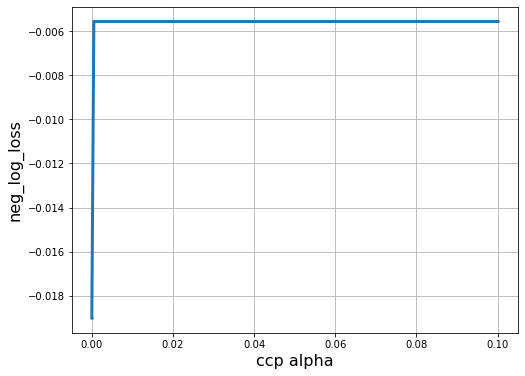

In [54]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('neg_log_loss', fontsize=16)
plt.scatter(ccp, logloss, s=2)
plt.plot(ccp, logloss, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [58]:
y1_cartCV_prob = dtc_cv_logloss.predict_proba(X1_test)[:,1]
ce_cartCV = log_loss(y1_test, y1_cartCV_prob)

ce_cartCV_Ratio = ce_cartCV / ce_baseline
print('ce_cartCV_Ratio is: ', ce_cartCV_Ratio)

ce_cartCV_Ratio is:  1.0


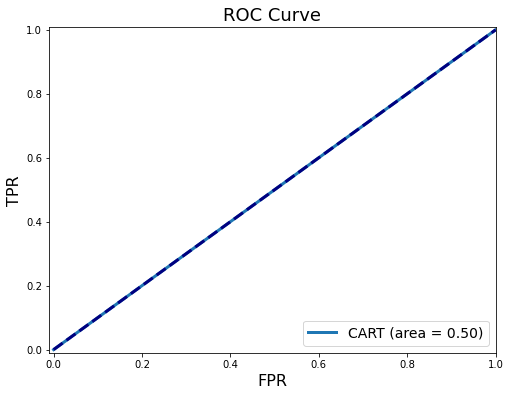

In [59]:
fpr2, tpr2, _ = roc_curve(y1_test, y1_cartCV_prob)
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr2, tpr2, lw=3, label='CART (area = {:0.2f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

#### different range of ccp_alpha

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time

grid_values = {'ccp_alpha': np.linspace(0, 0.5, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
#                'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]} 

tic = time.time()

dtc2 = DecisionTreeClassifier()
dtc_cv2_logloss = GridSearchCV(dtc2, param_grid = grid_values,scoring='neg_log_loss', cv=10, verbose=2) 
dtc_cv2_logloss.fit(X1_train, y1_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

Fitting 10 folds for each of 201 candidates, totalling 2010 fits
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.0s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   1.0s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] EN

[CV] END ccp_alpha=0.015, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0175, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0175, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0175, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0175, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0175, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0175, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0175, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0175, max_depth=30, min_samp

[CV] END ccp_alpha=0.0325, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.035, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.035, max_depth=30, min_samples_lea

[CV] END ccp_alpha=0.05, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0525, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.0525, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0525, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0525, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0525, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.0525, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0525, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.0525, max_depth=30, min_sampl

[CV] END ccp_alpha=0.0675, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.07, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.07, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.07, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.07, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.07, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.07, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.07, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.07, max_depth=30, min_samples_leaf=5, min

[CV] END ccp_alpha=0.085, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.08750000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.08750000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.08750000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.08750000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.08750000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.08750000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.08750000000000001, max_depth=30, min_samples_leaf=5, min_samples_spli

[CV] END ccp_alpha=0.10250000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.10250000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.10250000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.105, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.105, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.105, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.105, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.105, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_a

[CV] END ccp_alpha=0.12, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.12, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.12, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.12, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.12, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.1225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.1225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.1225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.1225, max_depth=30, min_samples_leaf=

[CV] END ccp_alpha=0.1375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.1375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.1375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.1375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.1375, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.14, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.14, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.14, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.6s
[CV] END ccp_alpha=0.14, max_depth=30, min_samples_lea

[CV] END ccp_alpha=0.155, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.155, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.155, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.155, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.155, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.155, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.1575, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.1575, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.1575, max_depth=30, min_samples_l

[CV] END ccp_alpha=0.17250000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.17250000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.17250000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.17250000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.17250000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.17250000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.17250000000000001, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.17500000000000002, max_depth=30, min_samples_leaf=5, mi

[CV] END ccp_alpha=0.19, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.19, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.19, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.19, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.19, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.19, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.19, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.19, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.19, max_depth=30, min_samples_leaf=5, min_s

[CV] END ccp_alpha=0.20750000000000002, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.20750000000000002, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.20750000000000002, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.20750000000000002, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.20750000000000002, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.20750000000000002, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.20750000000000002, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.20750000000000002, max_depth=30, min_samples_leaf=5, mi

[CV] END ccp_alpha=0.2225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.225, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.225, max_depth=30, min_samples_lea

[CV] END ccp_alpha=0.24, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.24, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.24, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2425, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.2425, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.2425, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2425, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2425, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2425, max_depth=30, min_samples_l

[CV] END ccp_alpha=0.2575, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.2575, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.2575, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.26, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.26, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.26, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.26, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.26, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.26, max_depth=30, min_samples_leaf=5,

[CV] END ccp_alpha=0.275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2775, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.2775, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.2775, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.2775, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2775, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.2775, max_depth=30, min_sample

[CV] END ccp_alpha=0.2925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.2925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.2925, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.295, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.295, max_depth=30, min_sampl

[CV] END ccp_alpha=0.31, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.31, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.31, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.31, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.31, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.31, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.31, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.6s
[CV] END ccp_alpha=0.3125, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.6s
[CV] END ccp_alpha=0.3125, max_depth=30, min_samples_leaf=5, m

[CV] END ccp_alpha=0.3275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.3275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.3275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3275, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.33, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.6s
[CV] END ccp_alpha=0.33, max_depth=30, min_samples

[CV] END ccp_alpha=0.34500000000000003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.34500000000000003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.34500000000000003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.34500000000000003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.34500000000000003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.34500000000000003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.34500000000000003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.34750000000000003, max_depth=30, min_samples_leaf=5, mi

[CV] END ccp_alpha=0.3625, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.3625, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.3625, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3625, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3625, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.3625, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.6s
[CV] END ccp_alpha=0.3625, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3625, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3625, max_depth=30, min_sam

[CV] END ccp_alpha=0.38, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.38, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.38, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.38, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.38, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.38, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.38, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.38, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.38, max_depth=30, min_samples_leaf=5, min_s

[CV] END ccp_alpha=0.3975, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.3975, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3975, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.3975, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3975, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3975, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.3975, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3975, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.3975, max_depth=30, min_sam

[CV] END ccp_alpha=0.41250000000000003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.41250000000000003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.41250000000000003, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.41500000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.41500000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.41500000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.41500000000000004, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.41500000000000004, max_depth=30, min_samples_leaf=5, mi

[CV] END ccp_alpha=0.43, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.43, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.43, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.43, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.43, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4325, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.4325, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.4325, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.4325, max_depth=30, min_samples_leaf=

[CV] END ccp_alpha=0.4475, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4475, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4475, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4475, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4475, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.45, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.45, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.45, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.45, max_depth=30, min_samples_lea

[CV] END ccp_alpha=0.465, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.465, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.465, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.465, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.465, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4675, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.4675, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.4675, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.4675, max_depth=30, min_samples_

[CV] END ccp_alpha=0.4825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.4825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.4825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.4825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4825, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.4825, max_depth=30, min_sam

[CV] END ccp_alpha=0.5, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.5, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.5, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.7s
[CV] END ccp_alpha=0.5, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.5, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.9s
[CV] END ccp_alpha=0.5, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.5, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.5, max_depth=30, min_samples_leaf=5, min_samples_split=20, random_state=88; total time=   0.8s
[CV] END ccp_alpha=0.5, max_depth=30, min_samples_leaf=5, min_samples_sp

In [74]:
dtc_cv_logloss.best_params_

{'ccp_alpha': 0.0005,
 'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'random_state': 88}

In [75]:
dtc_cv2_logloss.best_params_

{'ccp_alpha': 0.0025,
 'max_depth': 30,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'random_state': 88}

In [77]:
y1_cartCV2_prob = dtc_cv_logloss.predict_proba(X1_test)[:,1]
ce_cartCV2 = log_loss(y1_test, y1_cartCV2_prob)

ce_cartCV2_Ratio = ce_cartCV2 / ce_baseline
print('ce_cartCV_Ratio is: ', ce_cartCV2_Ratio)

ce_cartCV_Ratio is:  1.0


In [48]:
logloss2 = dtc_cv2_logloss.cv_results_['mean_test_score'] # what sklearn calls mean_test_score is the holdout set, i.e. the validation set.
ccp2 = dtc_cv2_logloss.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp2, 'Validation default for DT': logloss2}).head(20)

,ccp alpha,Validation default for DT
0,0.0,-0.019004
1,0.0025,-0.005569
2,0.005,-0.005569
3,0.0075,-0.005569
4,0.01,-0.005569
5,0.0125,-0.005569
6,0.015,-0.005569
7,0.0175,-0.005569
8,0.02,-0.005569
9,0.0225,-0.005569


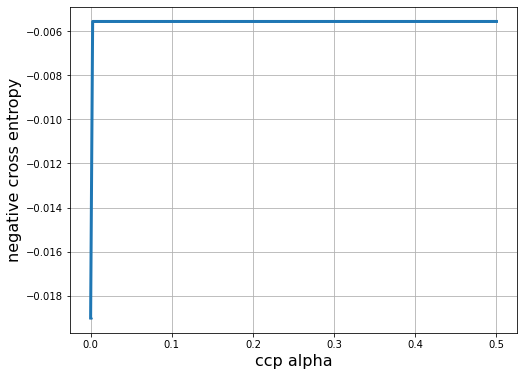

In [73]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('negative cross entropy', fontsize=16)
plt.scatter(ccp2, logloss2, s=2)
plt.plot(ccp2, logloss2, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [76]:
dtc_cv_logloss

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.02...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
            

### Random Forest 


#### CV of Random Forest parameters

In [33]:
X1_test.shape

(33890, 100)

In [35]:
# find suitable parameters
# other parameters are given in 242 lab

import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_values = {'max_features': np.linspace(1,100,100, dtype='int32'),
               'min_samples_leaf': [5],
               'max_depth':[30],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf2 = RandomForestClassifier() 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='neg_log_loss', cv=5, verbose=2)
rf_cv.fit(X1_train, y1_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   8.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   7.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   7.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   8.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  10.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  11.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  11.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   9.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  10.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  13.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  13.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  13.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  12.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  11.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=4, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  15.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=4, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  15.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=4, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  14.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=4, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  14.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=4, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  14.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  15.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  17.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=6, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  17.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=6, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=6, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=6, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  18.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=6, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  18.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=7, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=7, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=7, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=7, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=7, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  17.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  21.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  18.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  18.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=9, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=9, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  18.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=9, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  22.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=9, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  22.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=9, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=10, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=10, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  21.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=10, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=10, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=10, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=11, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  25.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=11, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=11, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  25.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=11, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  25.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=11, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  26.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=12, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  26.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=12, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=12, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=12, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  22.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=12, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  25.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=13, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  27.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=13, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  28.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=13, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  28.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=13, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  28.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=13, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  29.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=14, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  30.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=14, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  30.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=14, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  29.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=14, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 5.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=14, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  28.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=15, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  31.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=15, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  30.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=15, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  31.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=15, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  33.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=15, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  33.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  33.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  30.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  34.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  35.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  34.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  36.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  36.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  36.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  38.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  40.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  40.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=20, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  41.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=20, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  41.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=20, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=20, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  40.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=20, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  38.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=21, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  43.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=21, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  42.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=21, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  42.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=21, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  42.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=21, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  43.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=22, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  45.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=22, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  44.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=22, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  44.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=22, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  43.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=22, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  44.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=23, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  44.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=23, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  48.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=23, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  44.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=23, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  44.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=23, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  48.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=24, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  43.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=24, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  46.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=24, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  49.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=24, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  45.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=24, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  45.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=25, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  51.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=25, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  49.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=25, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  46.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=25, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  49.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=25, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  50.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=26, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  47.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=26, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  51.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=26, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  49.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=26, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  49.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=26, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  51.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=27, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  50.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=27, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  41.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=27, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  51.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=27, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  49.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=27, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  46.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=28, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  54.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=28, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  53.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=28, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  46.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=28, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  51.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=28, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  40.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=29, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  56.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=29, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  53.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=29, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  49.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=29, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  41.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=29, min_samples_leaf=5, n_estimators=500, random_state=88; total time=27.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=30, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=30, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  55.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=30, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  54.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=30, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  54.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=30, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  48.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=31, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  49.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=31, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  48.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=31, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  48.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=31, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  47.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=31, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  50.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=32, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  51.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=32, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  49.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=32, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  48.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=32, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=32, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  50.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  52.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  51.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  50.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  50.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  52.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  54.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  53.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  52.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  53.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  53.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  55.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  55.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  53.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  54.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  54.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=36, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  56.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=36, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  55.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=36, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  55.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=36, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  55.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=36, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  56.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=37, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=37, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=37, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  56.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=37, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  56.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=37, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=38, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=38, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=38, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=38, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=38, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=39, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=39, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=39, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=39, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=39, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=40, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=40, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=40, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=40, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=40, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=41, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=41, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=41, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=41, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=41, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=42, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=42, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=42, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=42, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=42, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=43, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=43, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=43, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=43, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=43, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=44, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=44, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=44, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=44, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=44, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=45, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=45, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=45, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=45, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=45, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=47, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=47, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=47, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=47, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=47, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=48, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=48, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=48, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=48, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=48, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=49, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=49, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=49, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=49, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=49, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=50, min_samples_leaf=5, n_estimators=500, random_state=88; total time=43.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=50, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=50, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=50, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=50, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=51, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=51, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=51, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=51, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=51, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=52, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=52, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=52, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=52, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=52, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=53, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=53, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=53, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=53, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=53, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=54, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=54, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=54, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=54, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=54, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=55, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=55, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=55, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=55, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=55, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=56, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=56, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=56, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=56, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=56, min_samples_leaf=5, n_estimators=500, random_state=88; total time=18.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=57, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=57, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=57, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=57, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=57, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=58, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=58, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=58, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=58, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=58, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=59, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=59, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=59, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=59, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=59, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=60, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=60, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=60, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=60, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=60, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=61, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=61, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=61, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=61, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=61, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=62, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 7.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=62, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=62, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=62, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=62, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=63, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=63, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=63, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=63, min_samples_leaf=5, n_estimators=500, random_state=88; total time=32.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=63, min_samples_leaf=5, n_estimators=500, random_state=88; total time=186.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=64, min_samples_leaf=5, n_estimators=500, random_state=88; total time=238.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=64, min_samples_leaf=5, n_estimators=500, random_state=88; total time=67.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=64, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=64, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=64, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=65, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=65, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=65, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=65, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=65, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=66, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=66, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=66, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=66, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=66, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=67, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=67, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=67, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=67, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=67, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=68, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=68, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=68, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=68, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=68, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=69, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=69, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=69, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=69, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=69, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=70, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=70, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=70, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=70, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=70, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=71, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=71, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=71, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=71, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=71, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=72, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=72, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=72, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=72, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=72, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=73, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=73, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=73, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=73, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=73, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=74, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=74, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=74, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=74, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=74, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=75, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=75, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=75, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=75, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=75, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=76, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=76, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=76, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=76, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=76, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=77, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=77, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=77, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=77, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=77, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=78, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=78, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=78, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=78, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=78, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 4.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=79, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=79, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=79, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=79, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=79, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=80, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=80, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=80, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=80, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=80, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=81, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=81, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=81, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=81, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=81, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=82, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=82, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=82, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=82, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=82, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=83, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=83, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=83, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=83, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=83, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=84, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=84, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=84, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=84, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=84, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=85, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=85, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=85, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=85, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=85, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=86, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=86, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=86, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=86, min_samples_leaf=5, n_estimators=500, random_state=88; total time=15.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=86, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=87, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=87, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=87, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=87, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=87, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=88, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=88, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=88, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=88, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=88, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=89, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=89, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=89, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=89, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=89, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=90, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=90, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=90, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=90, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=90, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=91, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=91, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=91, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=91, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=91, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 5.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=92, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=92, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=92, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=92, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=92, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=93, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=93, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=93, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=93, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=93, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=94, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=94, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=94, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=94, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=94, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=95, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=95, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=95, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=95, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=95, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=96, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=96, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=96, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=96, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=96, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=97, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=97, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=97, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=97, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=97, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=98, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=98, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=98, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=98, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=98, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=99, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=99, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=99, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=99, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=99, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=100, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=100, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=100, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=100, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=30, max_features=100, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


time: 83334.2 s


In [60]:
y1_rf_cv_prob = rf_cv.best_estimator_.predict_proba(X1_test)[:,1]
ce_rf_cv = log_loss(y1_test, y1_rf_cv_prob)
ce_rf_cvRatio = ce_rf_cv / ce_baseline
print('ce_rf_cvRatio is: ', ce_rf_cvRatio)

ce_rf_cvRatio is:  0.7667406879012778


In [61]:
ce_rf_cv

0.005143043063501094

In [67]:
rf_cv.best_params_

{'max_depth': 30,
 'max_features': 2,
 'min_samples_leaf': 5,
 'n_estimators': 500,
 'random_state': 88}

In [38]:
neg_log_loss = rf_cv.cv_results_['mean_test_score']
max_features = rf_cv.cv_results_['param_max_features']

pd.DataFrame({'max_features': max_features, 'neg cross entropy': neg_log_loss}).sort_values('neg cross entropy', ascending=False)

,max_features,neg cross entropy
1,2,-0.005160
0,1,-0.005165
2,3,-0.005179
3,4,-0.005261
4,5,-0.005305
...,...,...
90,91,-0.015299
62,63,-0.015310
99,100,-0.015317
96,97,-0.015593


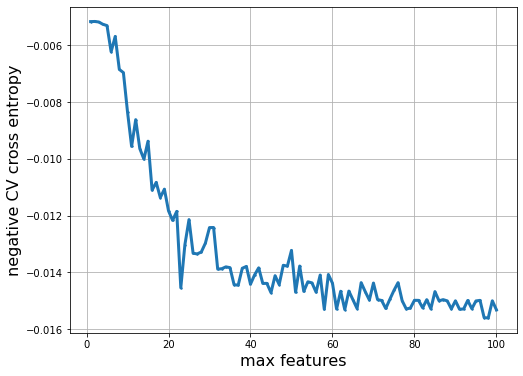

In [62]:
plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('negative CV cross entropy', fontsize=16)
plt.scatter(max_features, neg_log_loss, s=2)
plt.plot(max_features, neg_log_loss, linewidth=3)
plt.grid(True, which='both')
plt.show()

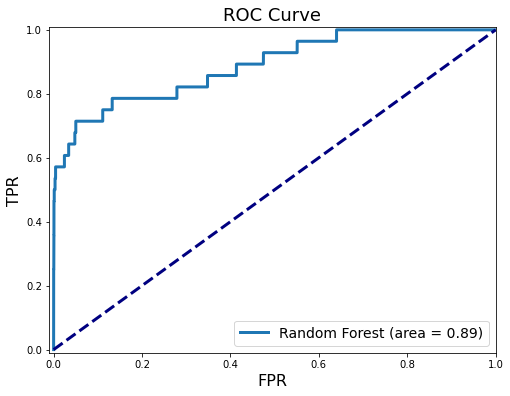

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr5, tpr5, _ = roc_curve(y1_test, y1_rf_cv_prob[:,1])
roc_auc5 = auc(fpr5, tpr5)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr5, tpr5, lw=3, label='Random Forest (area = {:0.2f})'.format(roc_auc5))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

* Conslusion:

This result seems worse than the default parameters. The difference between these two might be other hyperparameters such as max_depth and n_estimators

#### CV of random forest parameters  - test2

In [69]:
rf_cv3.best_params_

{'max_depth': 25,
 'max_features': 3,
 'min_samples_leaf': 5,
 'n_estimators': 500,
 'random_state': 88}

#### max_depth = 25

In [40]:
# find suitable parameters
# other parameters are given in 242 lab

import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_values = {'max_features': np.linspace(1,100,100, dtype='int32'),
               'min_samples_leaf': [5],
               'max_depth':[25],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf3 = RandomForestClassifier() 
rf_cv3 = GridSearchCV(rf3, param_grid=grid_values, scoring='neg_log_loss', cv=5, verbose=2)
rf_cv3.fit(X1_train, y1_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   8.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   7.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   7.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   7.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   7.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   9.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   9.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   8.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   9.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   9.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  10.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  10.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  10.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  10.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  10.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=4, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  12.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=4, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  12.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=4, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  15.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=4, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  15.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=4, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  15.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  17.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  13.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88; total time=41.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88; total time=30.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=6, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  17.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=6, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=6, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  17.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=6, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=6, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=7, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  17.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=7, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  17.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=7, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=7, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  16.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=7, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  17.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  20.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  20.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=9, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=9, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  20.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=9, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=9, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  20.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=9, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  19.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=10, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  21.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=10, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=10, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=10, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  21.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=10, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  21.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=11, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=11, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  26.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=11, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  23.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=11, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  22.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=11, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  22.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=12, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  24.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=12, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  26.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=12, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  27.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=12, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  25.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=12, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  26.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=13, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  26.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=13, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  28.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=13, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  29.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=13, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  28.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=13, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  30.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=14, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  31.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=14, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  31.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=14, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  30.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=14, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  31.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=14, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  28.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=15, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  29.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=15, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  27.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=15, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  27.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=15, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  31.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=15, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  31.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  34.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  34.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  32.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  32.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  29.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  30.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  34.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  32.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  31.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  32.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  35.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  34.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  35.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  38.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  38.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  33.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  33.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  34.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=20, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  35.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=20, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  40.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=20, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  35.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=20, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  36.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=20, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=21, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=21, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  36.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=21, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  35.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=21, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  36.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=21, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=22, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  42.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=22, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  43.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=22, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  37.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=22, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  38.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=22, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  41.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=23, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  41.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=23, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  40.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=23, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=23, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=23, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=24, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  40.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=24, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  40.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=24, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  39.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=24, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  41.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=24, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  41.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=25, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  43.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=25, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  43.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=25, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  43.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=25, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  48.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=25, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  47.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=26, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  50.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=26, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  48.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=26, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  45.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=26, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  41.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=26, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  52.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=27, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=27, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  56.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=27, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  55.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=27, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  56.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=27, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=28, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=28, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=28, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  56.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=28, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=28, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=29, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=29, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=29, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=29, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=29, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  53.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=30, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  51.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=30, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  54.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=30, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  60.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=30, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=30, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=31, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=31, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=31, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.2s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=31, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.8s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=31, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  53.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=32, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  51.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=32, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.6s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=32, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  54.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=32, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=32, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  55.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=36, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=36, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=36, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=36, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=36, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.5s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=37, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=37, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=37, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  56.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=37, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  56.4s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=37, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=38, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=38, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.3s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=38, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  57.9s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=38, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  58.7s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=38, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=39, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=39, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=39, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=39, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=39, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=40, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=40, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=40, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.1s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=40, min_samples_leaf=5, n_estimators=500, random_state=88; total time=  59.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=40, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=41, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=41, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=41, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=41, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=41, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=42, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=42, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=42, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=42, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=42, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=43, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=43, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=43, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=43, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=43, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=44, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=44, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=44, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=44, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=44, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=45, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=45, min_samples_leaf=5, n_estimators=500, random_state=88; total time=19.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=45, min_samples_leaf=5, n_estimators=500, random_state=88; total time=76.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=45, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=45, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=47, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=47, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=47, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=47, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=47, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=48, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=48, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=48, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=48, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=48, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=49, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=49, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=49, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=49, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=49, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=50, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=50, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=50, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=50, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=50, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=51, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=51, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=51, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=51, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=51, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=52, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=52, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=52, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=52, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=52, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=53, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=53, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=53, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=53, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=53, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=54, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=54, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=54, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=54, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=54, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=55, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=55, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=55, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=55, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=55, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=56, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=56, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=56, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=56, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=56, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=57, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=57, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=57, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=57, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=57, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=58, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=58, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=58, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=58, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=58, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=59, min_samples_leaf=5, n_estimators=500, random_state=88; total time=12.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=59, min_samples_leaf=5, n_estimators=500, random_state=88; total time=11.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=59, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=59, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=59, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=60, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 5.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=60, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=60, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=60, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=60, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 5.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=61, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=61, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=61, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=61, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=61, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=62, min_samples_leaf=5, n_estimators=500, random_state=88; total time=187.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=62, min_samples_leaf=5, n_estimators=500, random_state=88; total time=270.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=62, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=62, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=62, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=63, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=63, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=63, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=63, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=63, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=64, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=64, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=64, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=64, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=64, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=65, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=65, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=65, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=65, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=65, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=66, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=66, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=66, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 1.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=66, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=66, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=67, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=67, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=67, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=67, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=67, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=68, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=68, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=68, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=68, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=68, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=69, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=69, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=69, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 9.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=69, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 5.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=69, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=70, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=70, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=70, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=70, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=70, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=71, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=71, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=71, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=71, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=71, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=72, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=72, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=72, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=72, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=72, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=73, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=73, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=73, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=73, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=73, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=74, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=74, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=74, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=74, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=74, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=75, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=75, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=75, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=75, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=75, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=76, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=76, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=76, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=76, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=76, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=77, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=77, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=77, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=77, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=77, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=78, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=78, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=78, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=78, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=78, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=79, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=79, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 5.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=79, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=79, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=79, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=80, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 8.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=80, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=80, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=80, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=80, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=81, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=81, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=81, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=81, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=81, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=82, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=82, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=82, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=82, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=82, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=83, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=83, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=83, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=83, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=83, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 4.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=84, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=84, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=84, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=84, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=84, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=85, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=85, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=85, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=85, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=85, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=86, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=86, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=86, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=86, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=86, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=87, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=87, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=87, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=87, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=87, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=88, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=88, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.2min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=88, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=88, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=88, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=89, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=89, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=89, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=89, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=89, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=90, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=90, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=90, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=90, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 4.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=90, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=91, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=91, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=91, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=91, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=91, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=92, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=92, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=92, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=92, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=92, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=93, min_samples_leaf=5, n_estimators=500, random_state=88; total time=13.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=93, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=93, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=93, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=93, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=94, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=94, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=94, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.5min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=94, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=94, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=95, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=95, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.7min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=95, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.6min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=95, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=95, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=96, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=96, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.3min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=96, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=96, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.8min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=96, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.4min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=97, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=97, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=97, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=97, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=97, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 4.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=98, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=98, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=98, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=98, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=98, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=99, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=99, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=99, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=99, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=99, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 2.9min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=100, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.1min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=100, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=100, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=100, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=100, min_samples_leaf=5, n_estimators=500, random_state=88; total time= 3.0min


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


time: 86478.28 s


In [43]:
y1_rf_cv3_prob = rf_cv3.best_estimator_.predict_proba(X1_test)
ce_rf_cv3 = log_loss(y1_test, y1_rf_cv3_prob[:,1])
ce_rf_cv3Ratio = ce_rf_cv3 / ce_baseline
print('ce_rf_cv3Ratio is: ', ce_rf_cv3Ratio)

ce_rf_cv3Ratio is:  0.7351982726194353


In [47]:
ce_rf_cv3

0.004931466969156355

In [45]:
# percentage change when max_depth is set from 25 to 30
(ce_rf_cv - ce_rf_cv3) / ce_rf_cv3

0.04290327719277706

In [68]:
ce_rf_cv / ce_rf_cv3

1.042903277192777

In [52]:
neg_log_loss3 = rf_cv3.cv_results_['mean_test_score']
max_features3 = rf_cv3.cv_results_['param_max_features']

pd.DataFrame({'max_features': max_features3, 'neg cross entropy': neg_log_loss3}).sort_values('neg cross entropy', ascending=False)

,max_features,neg cross entropy
2,3,-0.005150
1,2,-0.005159
0,1,-0.005189
3,4,-0.005220
4,5,-0.005256
...,...,...
90,91,-0.015299
62,63,-0.015310
99,100,-0.015317
96,97,-0.015593


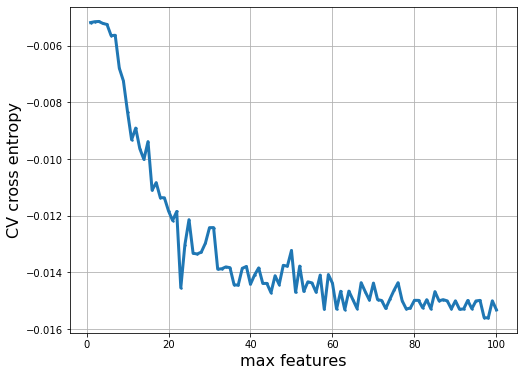

In [53]:
plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV cross entropy', fontsize=16)
plt.scatter(max_features3, neg_log_loss3, s=2)
plt.plot(max_features3, neg_log_loss3, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [ ]:
# ce of rf with default parameters and max_features chosen by cross validation
ce_rf_cv2 

In [ ]:
# ce_rf_skl: default random forest in 
# ce_rf_cv2: rf with default parameters and max_features chosen by cross validation
# relative increase of cross entropy 

(ce_rf_cv2 - ce_rf_skl) / ce_rf_skl

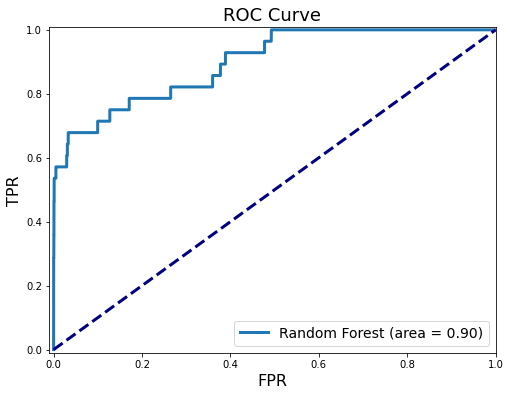

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr6, tpr6, _ = roc_curve(y1_test, y1_rf_cv3_prob[:,1])
roc_auc6 = auc(fpr6, tpr6)
plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr6, tpr6, lw=3, label='Random Forest (area = {:0.2f})'.format(roc_auc6))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

### Visualization

#### distribution of `Paying Price` based on `has click`

In [89]:
# prepare for visualization
ad_imp2clk_Vis = ad_imp2clk.copy()

In [90]:
has_click = {0 : 'not click', 1 :'click'}

In [91]:
ad_imp2clk_Vis['has click'] = ad_imp2clk_Vis['has click'].map(has_click)

In [92]:
ad_imp2clk_Vis['has click'].head()

0    not click
1    not click
2    not click
3    not click
4    not click
Name: has click, dtype: object

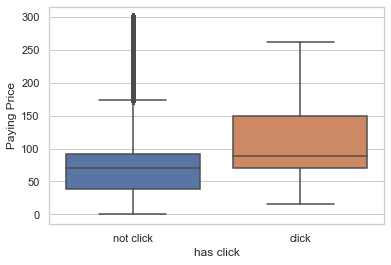

In [93]:
import seaborn as sns
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x='has click', y='Paying Price', data=ad_imp2clk_Vis)

#### user profile `11278` based on `has click`

In [95]:
ad_imp2clk_Vis.groupby('has click').sum()['11278']

has click
click         16.0
not click    129.0
Name: 11278, dtype: float64

In [96]:
ad_imp_NoClk = ad_imp2clk[ad_imp2clk['has click'] == 0]

In [100]:
# click
ad_clk['11278'].value_counts()

0.0    71
1.0    16
Name: 11278, dtype: int64

In [102]:
# not click
ad_imp_NoClk['11278'].value_counts()

0.0    121688
1.0       129
Name: 11278, dtype: int64

#### `Paying price` and  `has click`

In [ ]:
fig, ax = plt.subplots()
groups = ad_imp2clk.groupby('Region ID_clicks')
ax.margins(0.05)
for name, group in groups:
    ax.plot(group['Paying Price'], group['has click'], marker='o', linestyle='', ms=12, label=name)
# ax.legend(loc='best')
plt.ylim([-0.01, 1.04])
plt.xlabel('Paying Price')
plt.ylabel('click label')

#### `Timestamp` and `has click` 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(ad_imp2clk['Timestamp_imp'], ad_imp2clk['has click'])
plt.ylim([-0.01, 1.00])
plt.xlabel('Timestamp')
plt.ylabel('click label')

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = [4,8,12,16,1,4,9,16]
y = [1,4,9,16,4,8,12,3]
label = [0,1,2,3,0,1,2,3]
colors = ['red','green','blue','purple']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)


### Feature Importance for Random Forest

In [65]:
# importance score 
importance_score = pd.DataFrame({'Feature' : X1_train.columns, 
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

In [72]:
# top 50 importance score
top50_is = importance_score.sort_values('Importance score',ascending=False).head(50)
top50_is

,Feature,Importance score
5,Paying Price,10.2
27,11278,9.2
36,13042,5.2
0,Ad Slot Width,3.7
4,Timestamp_imp,3.5
2,Ad Slot Floor Price,3.1
3,Bidding Price,2.8
1,Ad Slot Height,2.6
8,10031,2.5
6,10006,2.3
